Here We are going to implement  our model to it

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
#Modelling
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score ,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
df=pd.read_csv("D:/ml project/notebook\data/StudentsPerformance.csv")

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Albin\AppData\Local\Temp\ipykernel_30120\2387258237.py:1: SyntaxWarning: invalid escape sequence '\d'
  df=pd.read_csv("D:/ml project/notebook\data/StudentsPerformance.csv")


In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
X=df.drop(columns=['math score'],axis=1)

In [5]:
y=df['math score']

In [6]:
num_features = X.select_dtypes(exclude="object").columns
cat_features =X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [7]:
numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()
preprocessor=ColumnTransformer(
    [
        
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features)
    ]
    
    
)

In [8]:
X=preprocessor.fit_transform(X)

In [9]:
X.shape

(1000, 19)

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape


((800, 19), (200, 19))

Let's Go Create an Evaluate Function to give all metrics after model Training

In [11]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_Square=r2_score(true,predicted)
    return mae,rmse,r2_Square

AttributeError: 'LinearRegression' object has no attribute 'keys'

Result

In [14]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# Dictionary of models
models = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoostRegressor": CatBoostRegressor(verbose=False),
    "AdaBoostRegressor": AdaBoostRegressor()
}

# Lists to store results
model_list = []
r2_list = []

# Loop through each model
for name, model in models.items():
    model.fit(x_train, y_train)

    # Predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Evaluation
    model_train_mse, model_train_mae, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mse, model_test_mae, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(name)
    model_list.append(name)

    print('Model performance for Training set:')
    print("Root Mean Squared Error (RMSE): {:.4f}".format(model_train_mse))
    print("Mean Absolute Error (MAE): {:.4f}".format(model_train_mae))
    print("R2 Score: {:.4f}".format(model_train_r2))

    print('-----------------')

    print('Model Performance for Test set:')
    print("Root Mean Squared Error (RMSE): {:.4f}".format(model_test_mse))  # FIXED: changed model_test_rmse to model_test_mse
    print("Mean Absolute Error (MAE): {:.4f}".format(model_test_mae))
    print("R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('=' * 35)
    print('\n')


LinearRegression
Model performance for Training set:
Root Mean Squared Error (RMSE): 4.2667
Mean Absolute Error (MAE): 5.3231
R2 Score: 0.8743
-----------------
Model Performance for Test set:
Root Mean Squared Error (RMSE): 4.2148
Mean Absolute Error (MAE): 5.3940
R2 Score: 0.8804


Lasso
Model performance for Training set:
Root Mean Squared Error (RMSE): 5.2063
Mean Absolute Error (MAE): 6.5938
R2 Score: 0.8071
-----------------
Model Performance for Test set:
Root Mean Squared Error (RMSE): 5.1579
Mean Absolute Error (MAE): 6.5197
R2 Score: 0.8253


Ridge
Model performance for Training set:
Root Mean Squared Error (RMSE): 4.2650
Mean Absolute Error (MAE): 5.3233
R2 Score: 0.8743
-----------------
Model Performance for Test set:
Root Mean Squared Error (RMSE): 4.2111
Mean Absolute Error (MAE): 5.3904
R2 Score: 0.8806


KNeighborsRegressor
Model performance for Training set:
Root Mean Squared Error (RMSE): 4.5168
Mean Absolute Error (MAE): 5.7079
R2 Score: 0.8555
-----------------
Mod

In [18]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"], ascending=False)


,Model Name,R2_Score
2,Ridge,0.880593
0,LinearRegression,0.880433
7,CatBoostRegressor,0.851632
4,RandomForestRegressor,0.850276
8,AdaBoostRegressor,0.843713
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,KNeighborsRegressor,0.783813
5,DecisionTreeRegressor,0.754087


LINEAR REGRESSION

In [19]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(x_train,y_train)
y_pred=lin_model.predict(x_test)
score=r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f"%score)

Accuracy of the model is 88.04


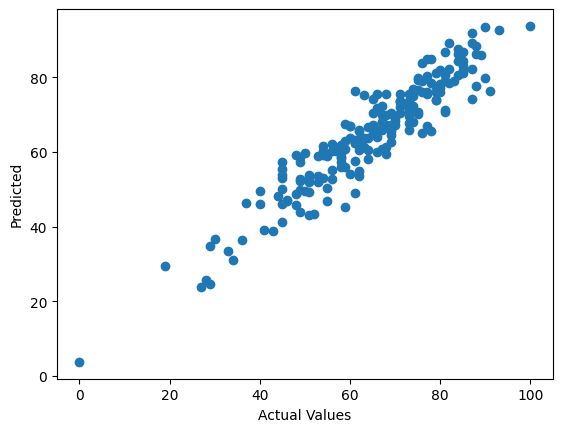

In [20]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual Values');
plt.ylabel('Predicted');

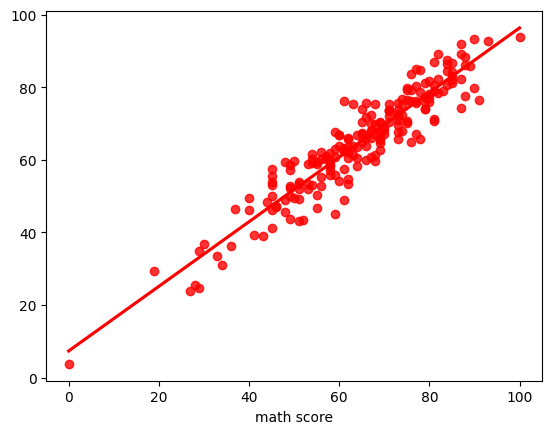

In [21]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red');

In [22]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
